# k-NN Perfomance Boosting

The one that could learn from the data, and that also offered enough complexity to produce an accurate decision function is k-nearest neighbors. Nearest neighbors can be slow when implemented in pure Python (i.e. with loops). This is especially the case when the number of data points or input dimensions is large.

The goal is to speed up nearest neighbors algorithm. In the notebook we are going **replace list-based operations by vector-based operations** between numpy arrays. The speed and correctness of the implementations will then be tested. In particular, performance graphs will be drawn.

## Nearest Neighbor: Pure Python

The most basic element of computation of nearest neighbors is its distance function relating two arbitrary data points `x1` and `x2`. We assume that these points are iterable (i.e. we can use a loop over their dimensions). One way among others to compute the square Euclidean distance between two points is by computing the sum of the component-wise distances.

In [1]:
def pydistance(x1, x2):
    return sum([(x1d - x2d) ** 2 for x1d, x2d in zip(x1, x2)])

where we use the prefix "`py-`" of the function to indicate that the latter makes use of pure `Python` instead of `numpy`. Once the distance matrix has been implemented, the nearest neighbor for a given unlabeled point `u` that we would like to classify is obtained by iterating over all points in the training set `(X, Y)`, selecting the point with smallest distance to `u`, and returning its corresponding label. Here `X` denotes the list of inputs in the training set and `Y` denotes the list of labels.

In [2]:
def pynearest(u, X, Y, distance=pydistance):
    xbest = None
    ybest = None
    dbest = float('inf')
    
    for x, y in zip(X, Y):
        d = distance(u, x)
        if d < dbest:
            ybest = y
            xbest = x
            dbest = d
            
    return ybest

Note that this function either uses function `pydistance` (given as default if the argument distance is not specified). Or one could specify as argument a more optimized function for distance compuation, for example, one that uses `numpy`. Finally, one might not be interested in classifying a single point, but many of them. The method below receives a collection of such unlabeled test points stored in the variable `U`. The function returns a list of predictions associated to each test point.

In [3]:
def pybatch(U, X, Y, nearest=pynearest, distance=pydistance):
    return [nearest(u, X, Y, distance=distance) for u in U]

Again, such function uses by default the Python nearest neighbor search (with a specified distance function). However, we can also specified a more optimized nearest neighbor function, for example, based on `numpy`. Finally, one could consider an alternative function to `pybatch` that would use `numpy` from the beginning to the end. The implementation of such more optimized functions, and the testing of their correct behavior and higher performance will be the object of this exercise sheet.

## Nearest Neighbor: Testing and correctness

As a starting point, the code below tests the output of the nearest neighbor algorithm for some toy dataset with fixed parameters. In particular, the function `data.toy(M,N,d)` generates a problem with `M` unlabeled test points stored in a matrix `U` of size `(M x d)`, then `N` labeled training points stored in a matrix `X` of size `(N x d)` and the output label is stored in a vector `Y` of size `N` composed of zeros and ones encoding the two possible classes. The variable `d` denotes the number of dimensions of each point. The toy dataset is pseudo-random, that is, for fixed parameters, it produce a random-looking dataset, but every time the method is called with the same parameters, the dataset is the same. The pseudo-randomness property will be useful to verify that each nearest neighbor implementation performs the same overall computation. Please check the `data.py` file within the folder for the implementation details. 

In [4]:
import data
U, X, Y = data.toy(20, 100, 50)
print(pybatch(U, X, Y))

[1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0]


In particular, the output of this function will help us to verify that the more optimized `numpy`-based versions of nearest neighbor are still valid.

## Nearest Neighbor: Plotting and performance

We now describe how to build a plot that relates a certain parameter of the dataset (e.g. the number of input dimensions `d` to the time required for the computation. We first initialize the basic plotting environment.

In [5]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 90

The following code plots the computation time of predicting `100` points from the test set using a training set of size `100`, and where we vary the number of input dimensions.

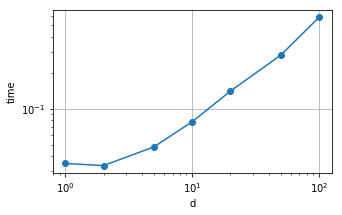

In [6]:
import time
import warnings
warnings.filterwarnings('ignore')

# Values for the number of dimensions d to test
dlist = [1, 2, 5, 10, 20, 50, 100]

# Measure the computation time for each choice of number of dimensions d
tlist = []
for d in dlist:
    U, X, Y = data.toy(100, 100, d)
    X = X.tolist()
    a = time.clock()
    pybatch(U, X, Y)
    b = time.clock()
    tlist += [b - a]

# Plot the results in a graph
plt.figure(figsize=(5, 3))
plt.plot(dlist, tlist, '-o')
plt.xscale('log'); plt.yscale('log'); plt.xlabel('d'); plt.ylabel('time'); plt.grid(True)

The time on the vertical axis is in seconds. Note that the exact computation time depends on the speed of your computer. As expected, the computation time increases with the number of input dimensions. Unfortunately, for the small dataset considered here (`100` training and test points of `100` dimensions each), the algorithm already takes more than one second to execute. Thus, it is necessary for practical applications to accelerate this nearest neighbor algorithm.

## Accelerating the distance computation

Create a new function `npdistance(x1,x2)` with the same output as `pydistance(x1,x2)`, but that computes the squared Euclidean distance using `numpy` operations. Verify that in both cases (i.e. using either `npdistance` or `pydistance` in the function `pybatch`) the output for the above toy example with parameters `M=20`, `N=100`, `d=50` (i.e. `data.toy(20,100,50)`) remains the same. The input vectors can be either `Python Lists` or `Numpy Arrays` so make sure that your function can handle both cases.

In [7]:
import numpy as np
def npdistance(x1,x2):
    
    if not isinstance(x1, np.ndarray): x1 = np.array(x1)
    if not isinstance(x2, np.ndarray): x2 = np.array(x2)

    return np.sum(np.square(x1-x2))
    raise NotImplementedError("Replace this line by your code.")

In [8]:
# Verify the function
assert npdistance([1,2,3], [2,3,4]) == 3
assert pybatch(U, X, Y, distance=pydistance) == pybatch(U, X, Y, distance=npdistance)

Create a plot similar to the one above, but where the computation time required by both methods are shown in a superposed manner. Here, we fix `M=100`, `N=100`, and we let `d` vary from `1` to `1000`, taking the list of values `[1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]`.

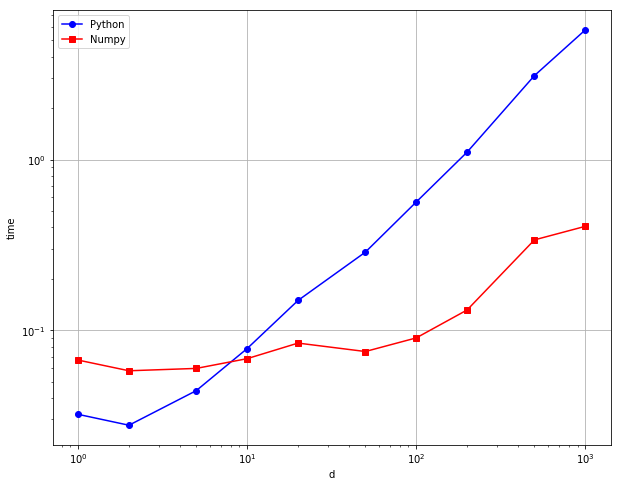

In [9]:
dlist = [1, 2, 5, 10, 20, 50, 100,200,500,1000]

# Measure the computation time for each choice of number of dimensions d
tlistPDist = []
tlistNPDist = []
for d in dlist:
    U, X, Y = data.toy(100, 100, d)
    X = X.tolist()
    a = time.clock()
    pybatch(U, X, Y)
    b = time.clock()
    tlistPDist += [b - a]
    c = time.clock()
    pybatch(U,X,Y, distance = npdistance)
    d = time.clock()
    tlistNPDist += [d-c]
    

# Plot the results in a graph
plt.figure(figsize=(10, 8))
plt.plot(dlist, tlistPDist, '-o', color ='blue', label = "Python")
plt.plot(dlist, tlistNPDist, '-s',color = 'red', label ="Numpy")
plt.legend(loc = "upper left")
plt.xscale('log'); plt.yscale('log'); plt.xlabel('d'); plt.ylabel('time'); plt.grid(True)

## Accelerating the search perfomance

Motivated by the success of the `numpy` optimized distance computation, we would like further accelerate the code by performing nearest neighbor search directly in `numpy`.
Create a new function `npnearest(u,X,Y)` as an alternative to the function `pynearest(u,X,Y,distance=npdistance)` that we have used previously.

In [10]:
def npnearest(u, X, Y, distance=npdistance):
    
    D = ((u.T - np.asarray(X))**2).sum(axis = 1) #idea from ilia, distances
    return Y[np.argmin(D)] #np.argmin Returns the indices of the minimum values along an axis
U, X, Y = data.toy(20, 100, 50)  
 

In [11]:
# Verify the function
assert pybatch(U, X, Y, nearest=pynearest) == pybatch(U, X, Y, nearest=npnearest)

 Create a plot similar to the one above, where the new method is compared to the previous one. Here, we fix `M=100`, `d=100`, and we let `N` take different values `[1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]`.

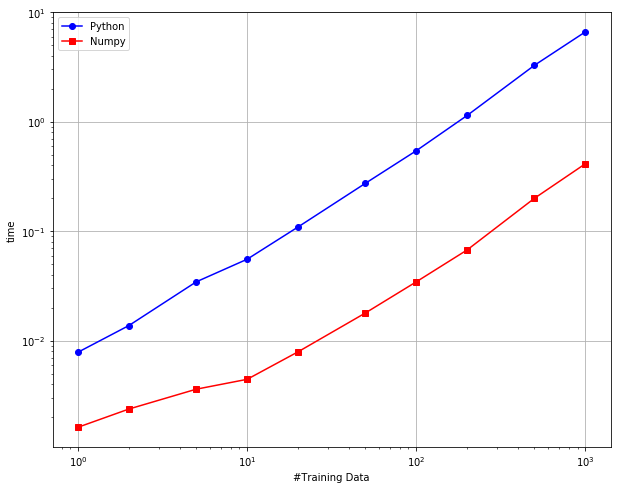

In [12]:
nlist = [1, 2, 5, 10, 20, 50, 100,200,500,1000]

# Measure the computation time for each choice of number of dimensions d
tlistPDist = []
tlistNPDist = []
for n in nlist:
    U, X, Y = data.toy(100,n , 100)
    X = X.tolist()
    a = time.clock()
    pybatch(U, X, Y, nearest=pynearest)
    b = time.clock()
    tlistPDist += [b - a]
    c = time.clock()
    pybatch(U,X,Y, nearest = npnearest)
    d = time.clock()
    tlistNPDist += [d-c]
    

# Plot the results in a graph
plt.figure(figsize=(10, 8))
plt.plot(dlist, tlistPDist, '-o', color ='blue', label = "Python")
plt.plot(dlist, tlistNPDist, '-s',color = 'red', label ="Numpy")
plt.legend(loc = "upper left")
plt.xscale('log'); plt.yscale('log'); plt.xlabel('#Training Data'); plt.ylabel('time'); plt.grid(True)

## Accelerating the processing of multiple test points

Create a new function `npbatch(U,X,Y)` as a replacement of the implementation `pybatch(U,X,Y,nearest=npnearest)` that we have built previously. Inside this function, use `scipy.spatial.distance.cdist` for the actual distance computation. Again, verify your function for the same toy example as before (i.e. `data.toy(20,100,50)`).

In [13]:
import scipy
def npbatch(U, X, Y, nearest=npnearest, distance=npdistance):
    
    from scipy.spatial import distance
    A = distance.cdist(U, X, 'sqeuclidean') #compute squared euclidean distance
    Z = np.argmin(A, axis = 1) #get index of minimal value in each row
    return [Y[Z[i]] for i in range(Z.shape[0])] #retun corresponding labels

U, X, Y = data.toy(20, 100, 50) 

In [14]:
assert np.all(pybatch(U, X, Y) == npbatch(U, X, Y))

Create a plot comparing the computation time of the new implementation compared to the previous one. Here, we fix `N=100`, `d=100`, and we let `M` vary from `1` to `1000` with values `[1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]`.

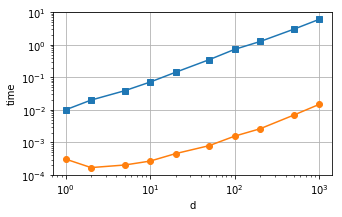

In [15]:
Mlist = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]
# Measure the computation time for each choice of number of dimensions d
tlist = []
ntlist = []
for M in Mlist:
    U, X, Y = data.toy(100, M, 100)
    X = X.tolist()
    a = time.clock()
    pybatch(U, X, Y)
    b = time.clock()
    tlist += [b - a]
    a2 = time.clock()
    npbatch(U, X, Y)
    b2 = time.clock()
    ntlist += [b2 - a2]

# Plot the results in a graph
plt.figure(figsize=(5, 3))
plt.plot(dlist, tlist, '-s')
plt.plot(dlist, ntlist, '-o')
#todo: LEGEND
plt.xscale('log'); plt.yscale('log'); plt.xlabel('d'); plt.ylabel('time'); plt.grid(True)

## Application to digital recognition

Having now implemented an efficient K-nearest neighbor classifier, we can test it on real problems with many data points and dimensions. We consider a small handwritten digits recognition dataset, that can be directly obtained from the library `scikit-learn`. This dataset consists of handwritten digits of size `8 x 8` flattened into arrays of size `64`, with class between `0` and `9`. We use a function `data.digits()` to load the data and arrange data points in some predefined order.

In [16]:
X, Y = data.digits()

Using the function `imshow` of `matplotlib.pyplot (plt)` to visualize the first 100 digits of the dataset.

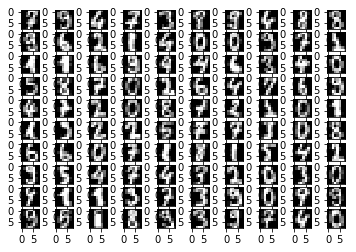

In [17]:
def train_test_split(x, y):
    x_train= x[:1000]
    x_test = x[1000:]
    y_train= y[:1000]
    y_test=  y[1000:]
    
    return x_train, x_test, y_train, y_test

def predict(x_train, x_test, y_train):
    y_test = npbatch(x_test,x_train,y_train)
    return y_test






def plot_first_digits():
    for i in range(100):
        plt.subplot(10,10,i+1)
        plt.imshow(X[i].reshape(8,8),cmap="gray")
plot_first_digits()

Partition the data into a "training" set and "test" set. The training set contains the first 1000 digits of `X`, and the test set contains the remaining ones. 

In [18]:
def train_test_split(x, y):
    x_train= x[:1000]
    x_test = x[1000:]
    y_train= y[:1000]
    y_test=  y[1000:]
   
    return x_train, x_test, y_train, y_test

def predict(x_train, x_test, y_train):
    y_test = npbatch(x_test,x_train,y_train)
    return y_test

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)
print(predict(x_train, x_test, y_train))

[0, 7, 3, 5, 9, 4, 7, 2, 5, 6, 1, 2, 7, 0, 0, 6, 2, 2, 4, 4, 3, 4, 0, 2, 7, 9, 1, 4, 4, 4, 9, 4, 7, 7, 3, 1, 4, 9, 9, 3, 2, 4, 0, 4, 2, 7, 7, 5, 4, 1, 4, 5, 7, 9, 3, 7, 2, 8, 4, 9, 8, 3, 7, 6, 5, 5, 7, 4, 3, 7, 3, 5, 0, 3, 5, 0, 0, 7, 0, 5, 9, 3, 3, 4, 7, 9, 4, 8, 6, 4, 0, 0, 8, 2, 9, 4, 6, 4, 9, 0, 0, 3, 1, 6, 5, 1, 0, 1, 9, 2, 2, 8, 2, 6, 1, 1, 3, 8, 2, 3, 5, 5, 8, 0, 5, 4, 8, 0, 7, 3, 6, 4, 0, 8, 9, 4, 8, 9, 9, 7, 4, 4, 6, 8, 4, 5, 2, 9, 9, 4, 0, 5, 8, 5, 2, 2, 7, 6, 4, 8, 3, 0, 7, 6, 5, 6, 1, 0, 9, 3, 5, 6, 3, 6, 3, 3, 0, 0, 1, 4, 1, 1, 9, 3, 8, 8, 8, 8, 2, 0, 7, 6, 5, 6, 8, 2, 0, 6, 8, 6, 0, 0, 0, 6, 9, 3, 7, 0, 1, 8, 9, 9, 9, 1, 7, 0, 5, 5, 5, 6, 4, 1, 4, 8, 6, 6, 8, 3, 1, 0, 5, 2, 2, 6, 8, 4, 2, 1, 0, 4, 6, 9, 9, 6, 1, 7, 2, 3, 4, 0, 5, 5, 7, 4, 8, 1, 1, 7, 8, 7, 1, 7, 5, 1, 2, 1, 3, 2, 2, 9, 8, 7, 8, 2, 7, 2, 7, 1, 0, 9, 2, 8, 4, 2, 1, 0, 4, 2, 7, 2, 6, 9, 2, 1, 2, 5, 4, 7, 1, 6, 3, 4, 4, 7, 0, 0, 9, 9, 9, 9, 9, 9, 1, 1, 9, 5, 7, 3, 8, 4, 8, 6, 6, 3, 1, 8, 6, 8, 4, 3, 6, 2, 3, 

Finally, in order to determine the accuracy of the classifier, we would like to compare the predictions with the ground truth (i.e. the true labels from the test data). Compute the fraction of the test set where the predictions of the nearest neighbor algorithm and labels disagree. 

In [20]:
def evaluate(x_train, x_test, y_train, y_test):
    testLabels = predict(x_train, x_test, y_train)
    correctLabels = np.sum((np.asarray(testLabels) == np.asarray(y_test)))
    totalLabels = len(y_test)
    ratio_disagree = (totalLabels-correctLabels)/totalLabels

    print(ratio_disagree*100)
    return ratio_disagree

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y)
ratio_disagree = evaluate(x_train, x_test, y_train, y_test)
assert 0 <= ratio_disagree <= 1

0.8782936010037641
